dataset_tr =torch.utils.data.DataLoader
dataloader_tr = torch.utils.data.DataLoader(dataset_tr, bach_size=50)
for epoch in tange(epochs)
    for image, label in loader_tr:
        train(image, label)



In [2]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import matplotlib.pyplot as plt

#   CLASE DATASET  ###############

class x(Dataset):

    def __init__(self):
        xy = np.loadtxt('path-to-data', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # [Etiqueta de clase, Features]
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # Obtener la muestra i-th (index)
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # Longitud de datos
    def __len__(self):
        return self.n_samples

# Tarea de clase:

Rellena las celdas del notebook para un dataset concreto (https://pytorch.org/vision/stable/datasets.html) Image classification, con parámetro "download":

    1. Crear una instancia dataset para train y otra para test.
    2. Crear ambos cargadores de datos.
    3. Muestra las dimensiones del dato 525 y su etiqueta.
    4. Muestra la banda R matplotlib.
    5. Muestra la imagen con matplotlib.
    6. Calcular el valor promedio de cada dato.
    7. Aplica random crop a un tamaño 40% inferior al actual y repite el proceso. ¿Sale la misma Media?¿El tamaño del dataset ha variado?¿Por qué?

In [3]:
# 1 Crear una instancia dataset para train y otra para test.
transform=torchvision.transforms.ToTensor()
print(torchvision.__version__)


train_dataset = datasets.CIFAR10('./tmp/data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./tmp/data', train=False, transform=transform)




0.13.1+cu102
Files already downloaded and verified


In [4]:
# 2 Crear ambos cargadores de datos.

batch_size = 50
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [5]:
# 3 Muestra las dimensiones del dato 525 y su etiqueta.
print("dimensiones",len(train_dataset.data[525]))
print("La etiqueta de la imagen es ", train_dataset.classes[train_dataset.targets[525]], "teniendo ", len(train_dataset.classes), "posibilidades")



dimensiones 32
La etiqueta de la imagen es  frog teniendo  10 posibilidades


In [6]:
# bucle sobre dataloader (MNIST tiene 60k samples para training y 10k samples para test)

num_epochs = 1
total_train_samples = len(train_loader.dataset)
total_test_samples  = len(test_loader.dataset)
print(total_train_samples, total_test_samples)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i}| Inputs {inputs.shape} | Labels {labels.shape}')

50000 10000
Epoch: 1/1, Step 0| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 1| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 2| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 3| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 4| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 5| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 6| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 7| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 8| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 9| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 10| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 11| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, St

In [8]:
#4 Muestra la banda R matplotlib.

display(train_loader.dataset[525][0])


tensor([[[0.3451, 0.4824, 0.4784,  ..., 0.1647, 0.2000, 0.2078],
         [0.3333, 0.4431, 0.4549,  ..., 0.2196, 0.2902, 0.3804],
         [0.3451, 0.4275, 0.4549,  ..., 0.3176, 0.3765, 0.4824],
         ...,
         [0.1804, 0.2667, 0.2824,  ..., 0.5529, 0.4706, 0.4196],
         [0.1098, 0.2392, 0.2941,  ..., 0.4588, 0.4275, 0.4353],
         [0.0588, 0.0941, 0.1725,  ..., 0.4196, 0.4549, 0.5255]],

        [[0.4745, 0.6588, 0.6549,  ..., 0.2000, 0.2118, 0.2039],
         [0.4667, 0.6157, 0.6235,  ..., 0.2039, 0.2588, 0.3412],
         [0.4745, 0.5922, 0.6078,  ..., 0.2667, 0.3098, 0.4157],
         ...,
         [0.1216, 0.1725, 0.1725,  ..., 0.4471, 0.3686, 0.3137],
         [0.0588, 0.1569, 0.1961,  ..., 0.3529, 0.3216, 0.3294],
         [0.0314, 0.0392, 0.0980,  ..., 0.3137, 0.3529, 0.4196]],

        [[0.0902, 0.0980, 0.0980,  ..., 0.0784, 0.0980, 0.1059],
         [0.0863, 0.0627, 0.0824,  ..., 0.0824, 0.1333, 0.2196],
         [0.1020, 0.0549, 0.1059,  ..., 0.1373, 0.1804, 0.

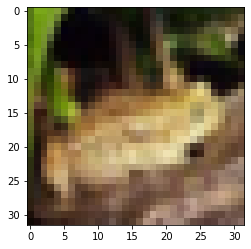

In [ ]:
 #5 Muestra la imagen con matplotlib.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(train_dataset.data[525])
plt.show()

In [10]:
#6 Calcular el valor promedio de cada dato.
torch.mean(train_loader.dataset.input())


AttributeError: 'CIFAR10' object has no attribute 'input'

In [ ]:
#7 Aplica random crop a un tamaño 40% inferior al actual y repite el proceso. 
# ¿Sale la misma Media?¿El tamaño del dataset ha variado?¿Por qué?
torchvision.transforms.RandomCrop(size, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')